##**Predict Credit Risk and Analysis**

**Importing Libraries**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

**Data Preprocesing**

In [ ]:
df = pd.read_csv('credit_risk.csv')
df.head(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.mean()

Id                16290.006139
Age                  27.734600
Income            66074.848470
Emp_length            4.789686
Amount             9589.371106
Rate                 11.011695
Status                0.218164
Percent_income        0.170203
Cred_length           5.804211
dtype: float64

In [ ]:
df.skew()

Id                 0.000004
Age                2.581393
Income            32.865349
Emp_length         2.614455
Amount             1.192477
Rate               0.208550
Status             1.364888
Percent_income     1.064669
Cred_length        1.661790
dtype: float64

In [ ]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
print(f"\n{df['Default'].unique()}, \n{df['Intent'].unique()}, \n{df['Home'].unique()}")


['Y' 'N'], 
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'], 
['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [ ]:
df['Default'] = df['Default'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
df.shape

(28638, 12)

**Exploratory Data Analysis**



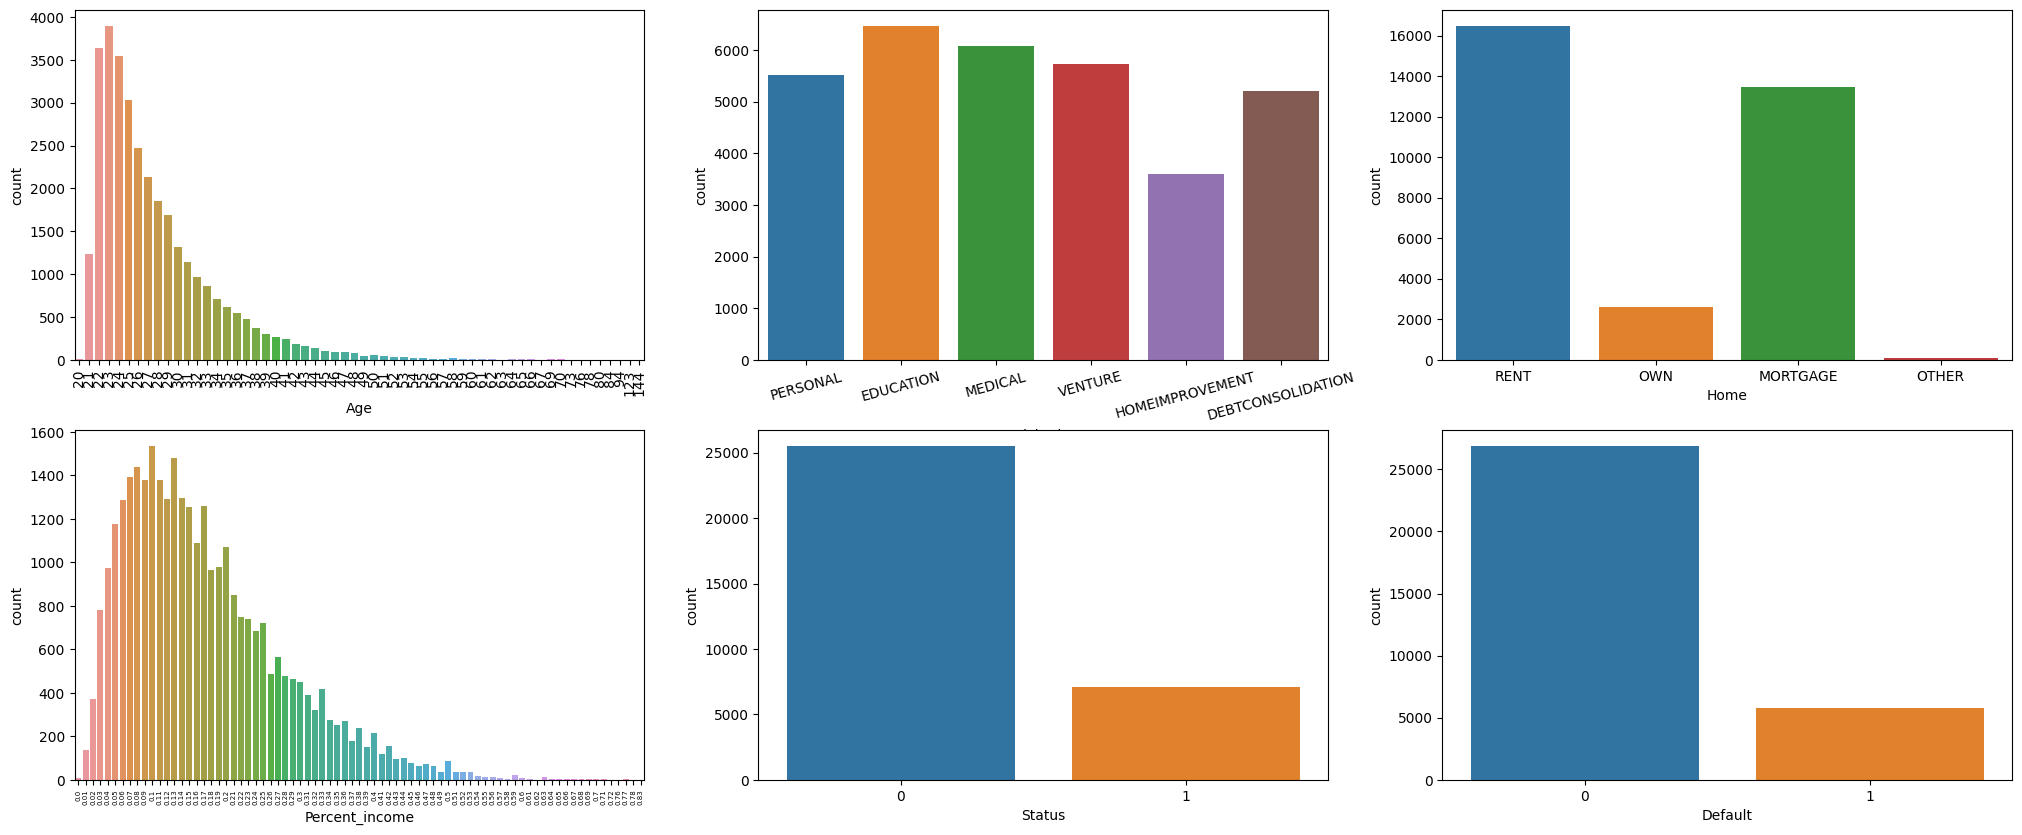

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

sns.countplot(data = df, x = 'Age', ax=ax[0,0])
sns.countplot(data = df, x = 'Intent' ,ax=ax[0,1])
sns.countplot(data = df, x ='Home', ax=ax[0,2])
sns.countplot(data = df, x = 'Percent_income', ax=ax[1,0])
sns.countplot(data = df, x = 'Status' ,ax=ax[1,1])
sns.countplot(data = df, x ='Default' ,ax=ax[1,2])

ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90, fontsize = 5)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=15)

plt.show()

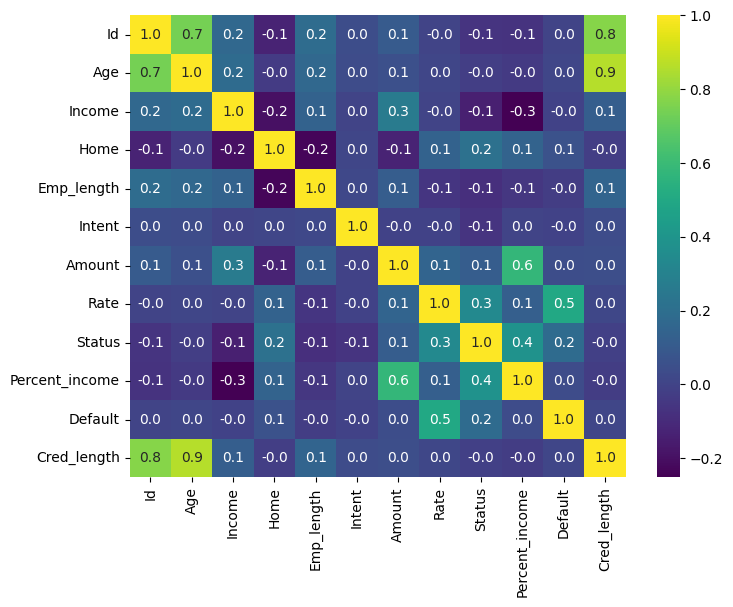

In [197]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='viridis')
plt.show()

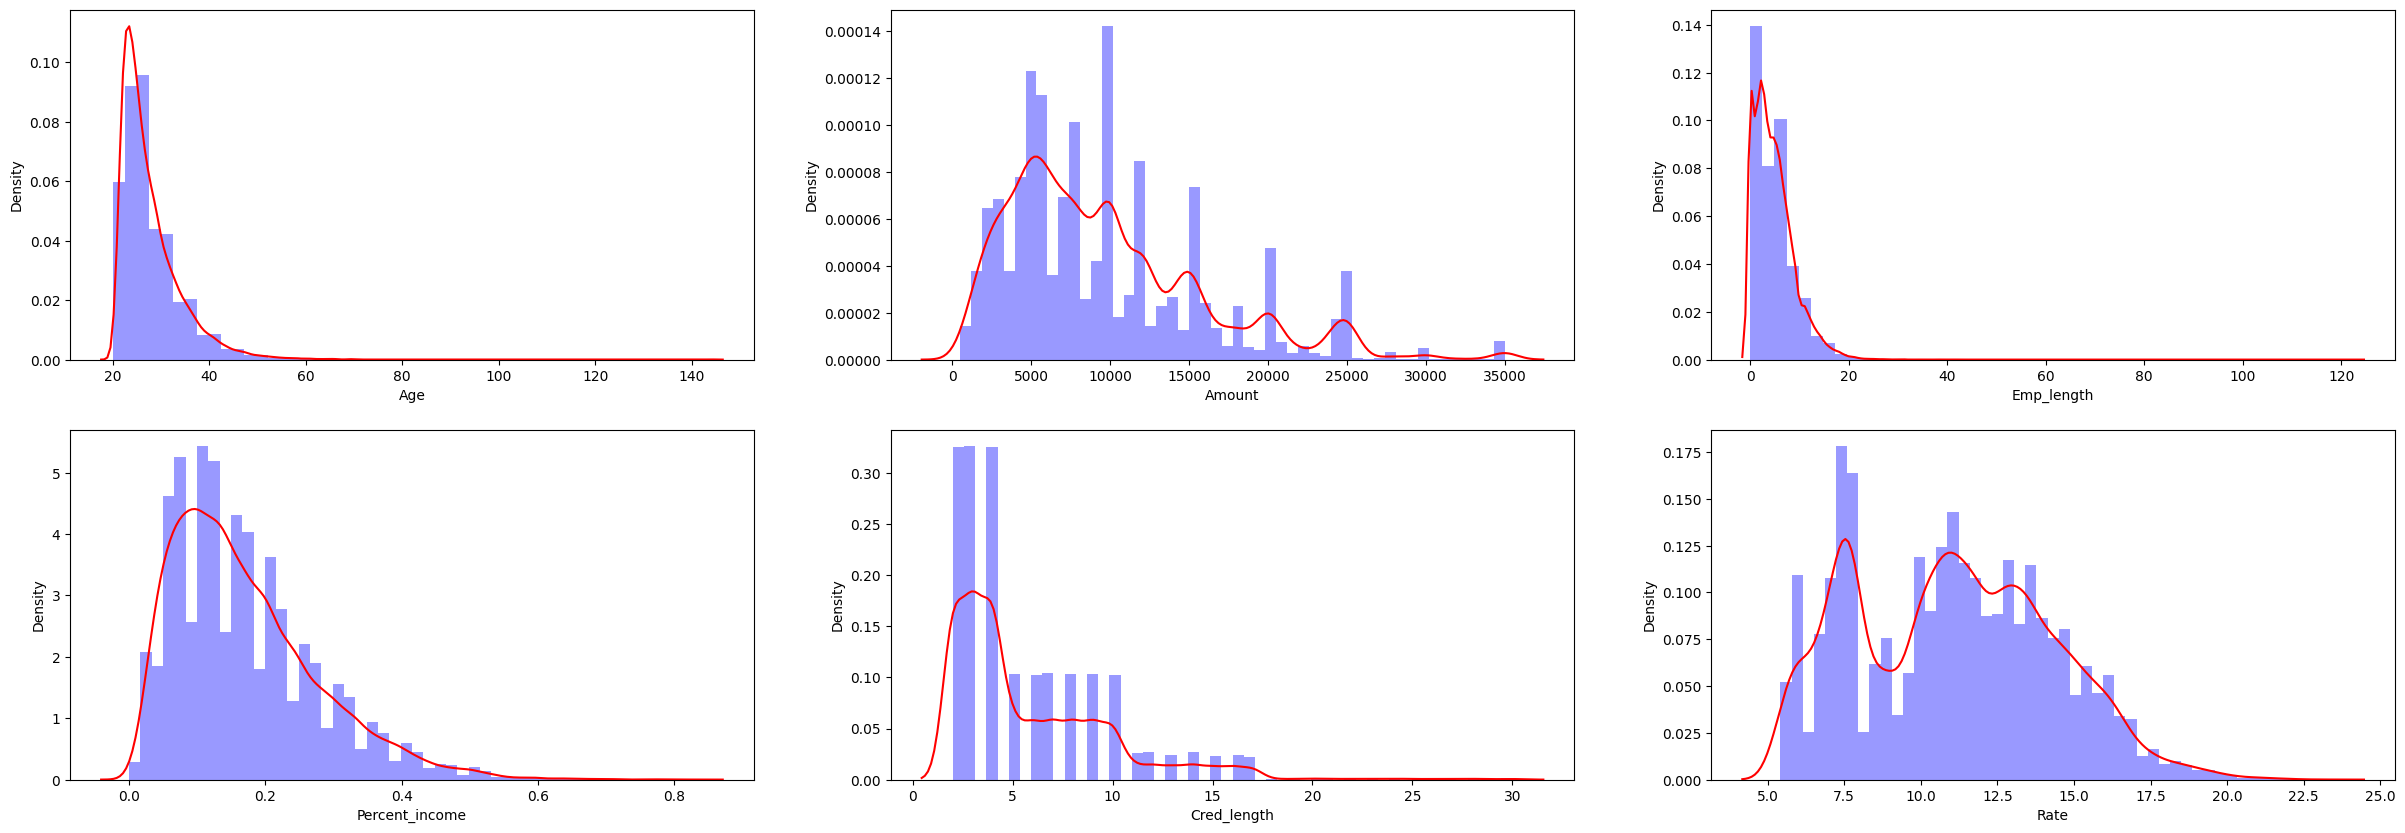

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))

sns.distplot(df['Age'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Amount'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Emp_length'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Percent_income'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Cred_length'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Rate'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

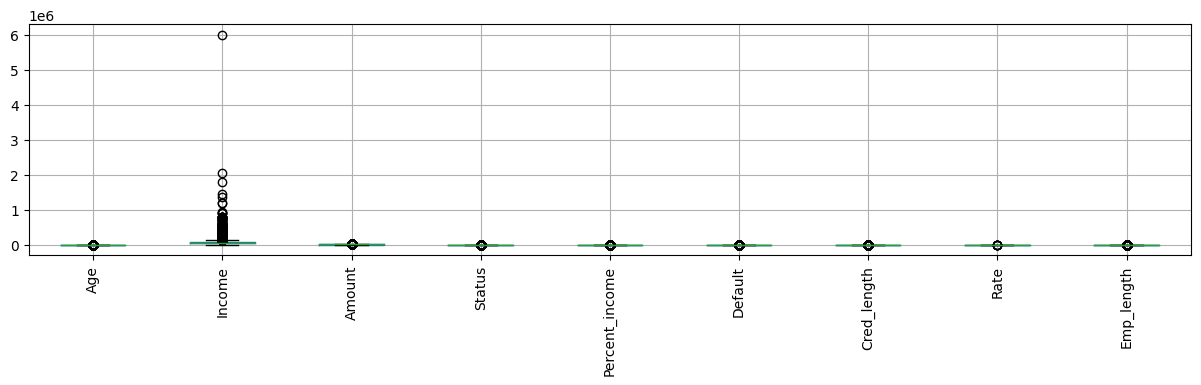

In [ ]:
plt.figure(figsize=(15, 3))
df[['Age', 'Income', 'Amount', 'Status', 'Percent_income', 'Default','Cred_length', 'Rate', 'Emp_length']].boxplot()
plt.xticks(rotation=90)
plt.show()

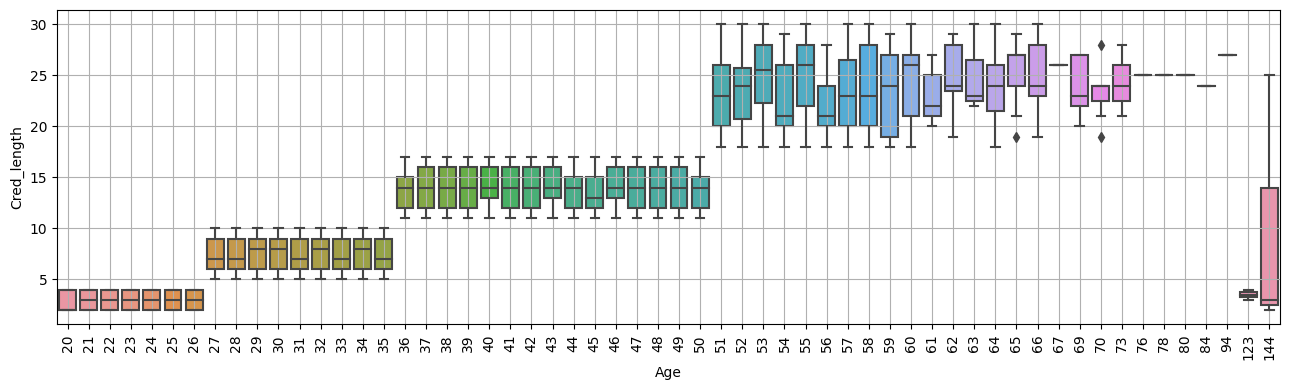

In [ ]:
plt.figure(figsize=(13, 4))

sns.boxplot(data=df, x='Age', y='Cred_length')

plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

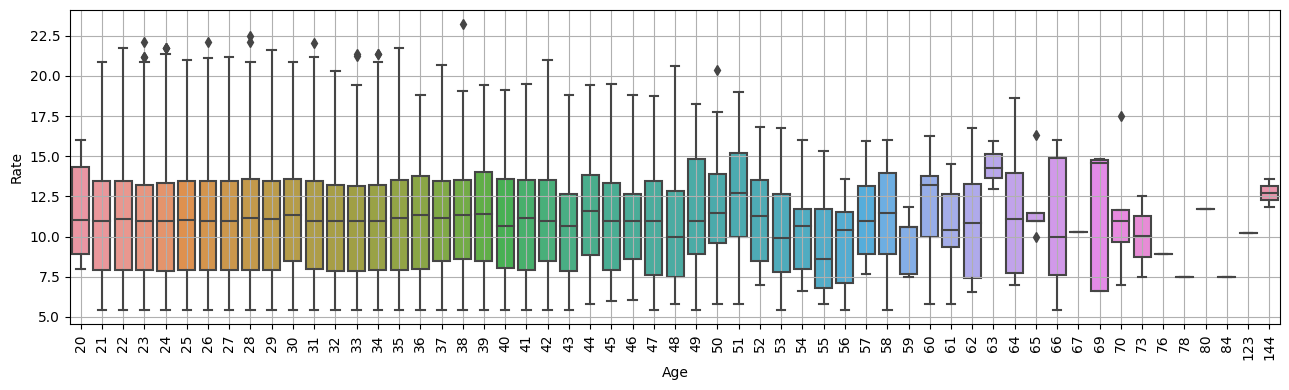

In [ ]:
plt.figure(figsize=(13, 4))

sns.boxplot(data=df, x='Age', y='Rate')

plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

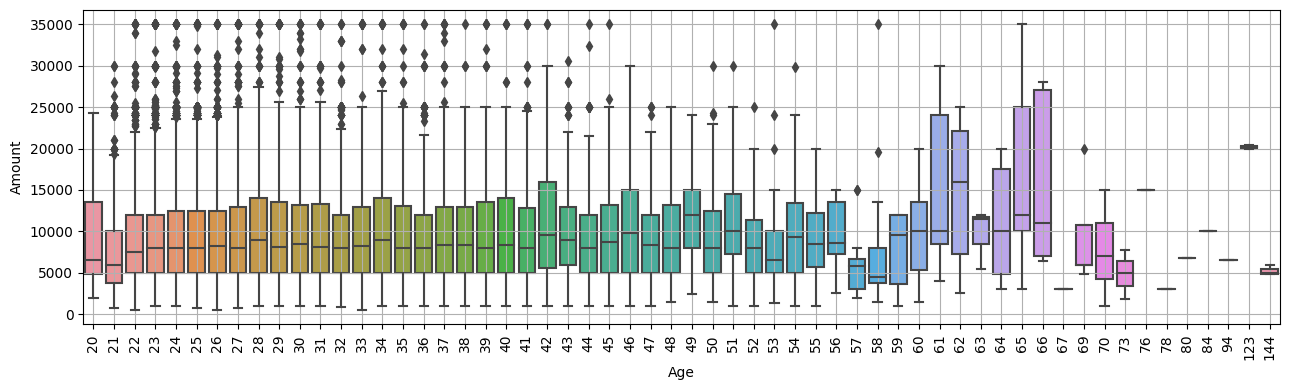

In [ ]:
plt.figure(figsize=(13, 4))

sns.boxplot(data=df, x='Age', y='Amount')

plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

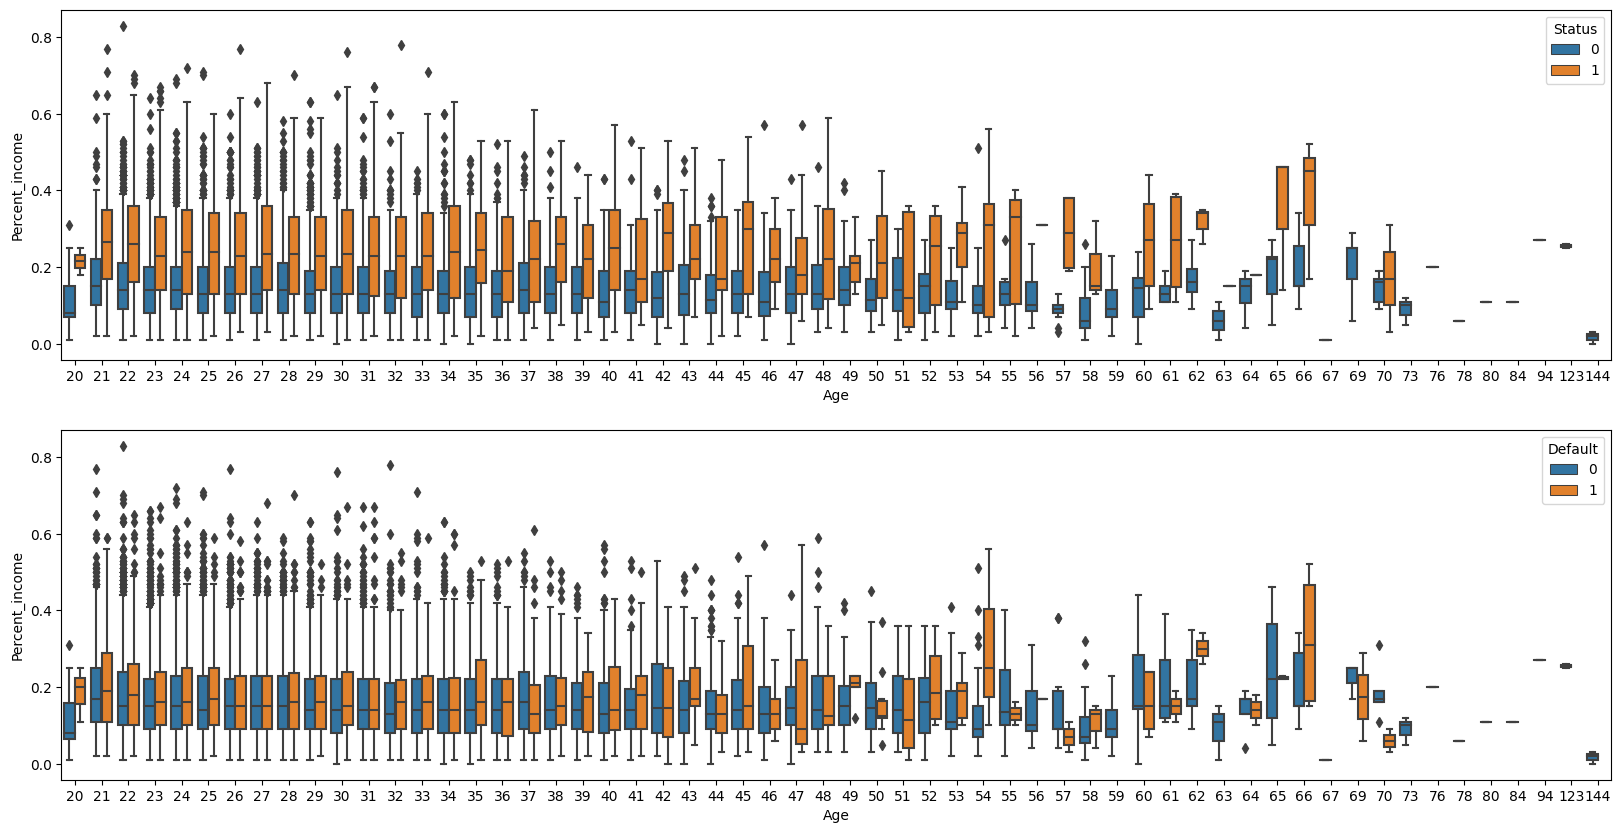

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(data=df, x='Age', y='Percent_income', hue ='Status', ax = ax[0])
sns.boxplot(data=df, x='Age', y='Percent_income', hue ='Default', ax = ax[1])

plt.show()

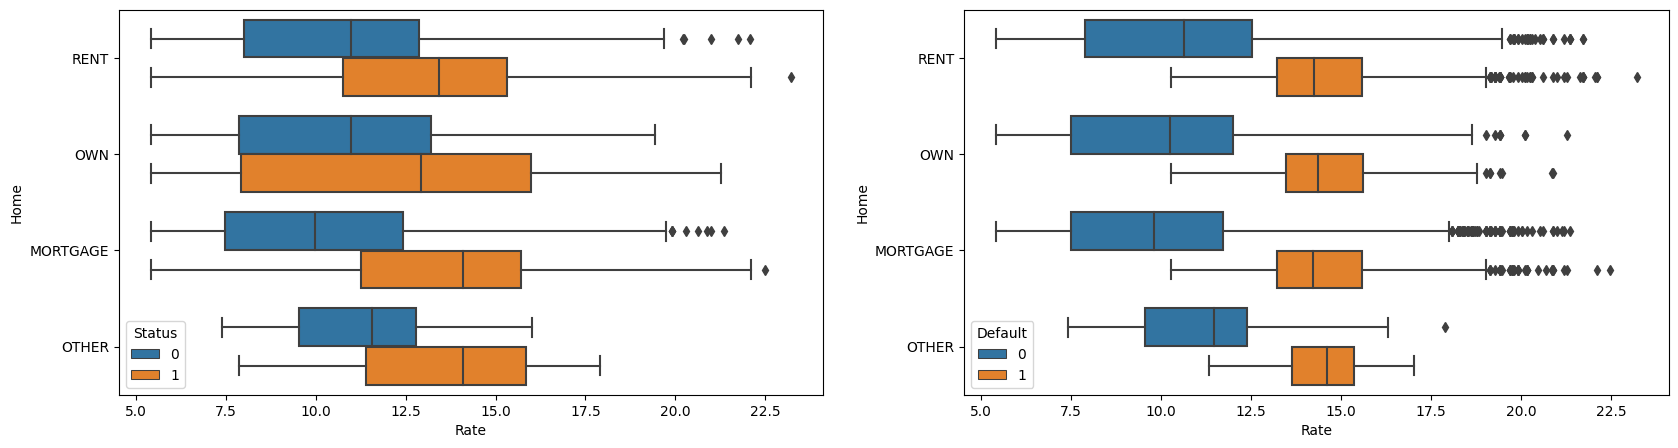

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df, x='Rate', y='Home', hue ='Status', ax = ax[0])
sns.boxplot(data=df, x='Rate', y='Home', hue ='Default', ax = ax[1])

plt.show()

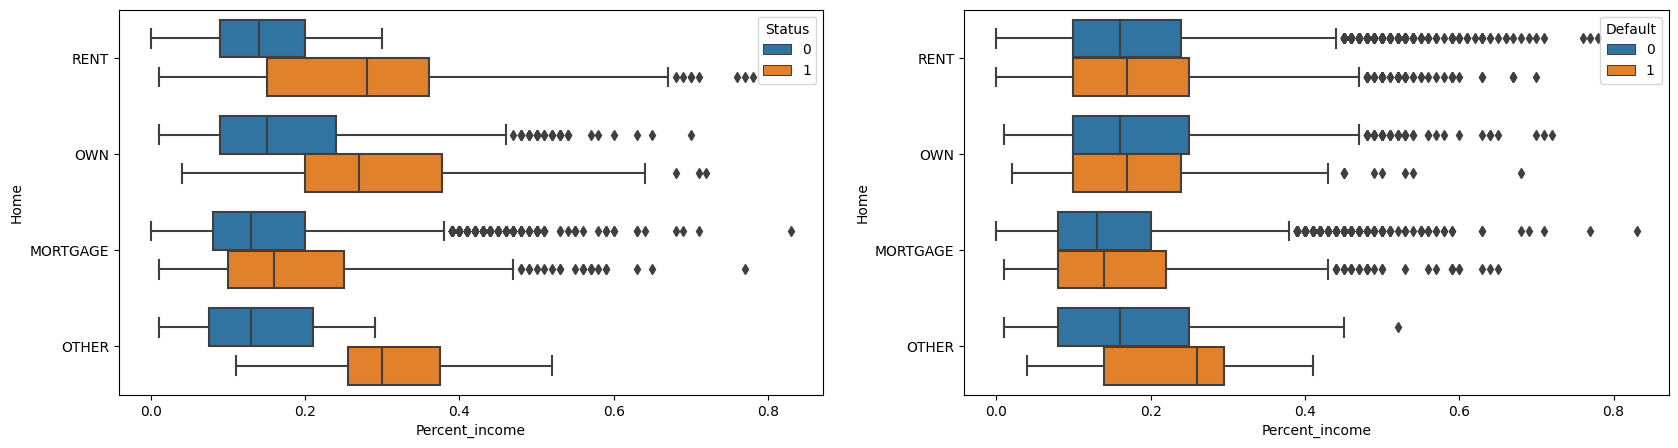

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df, x='Percent_income', y='Home', hue ='Status', ax = ax[0])
sns.boxplot(data=df, x='Percent_income', y='Home', hue ='Default', ax = ax[1])

plt.show()

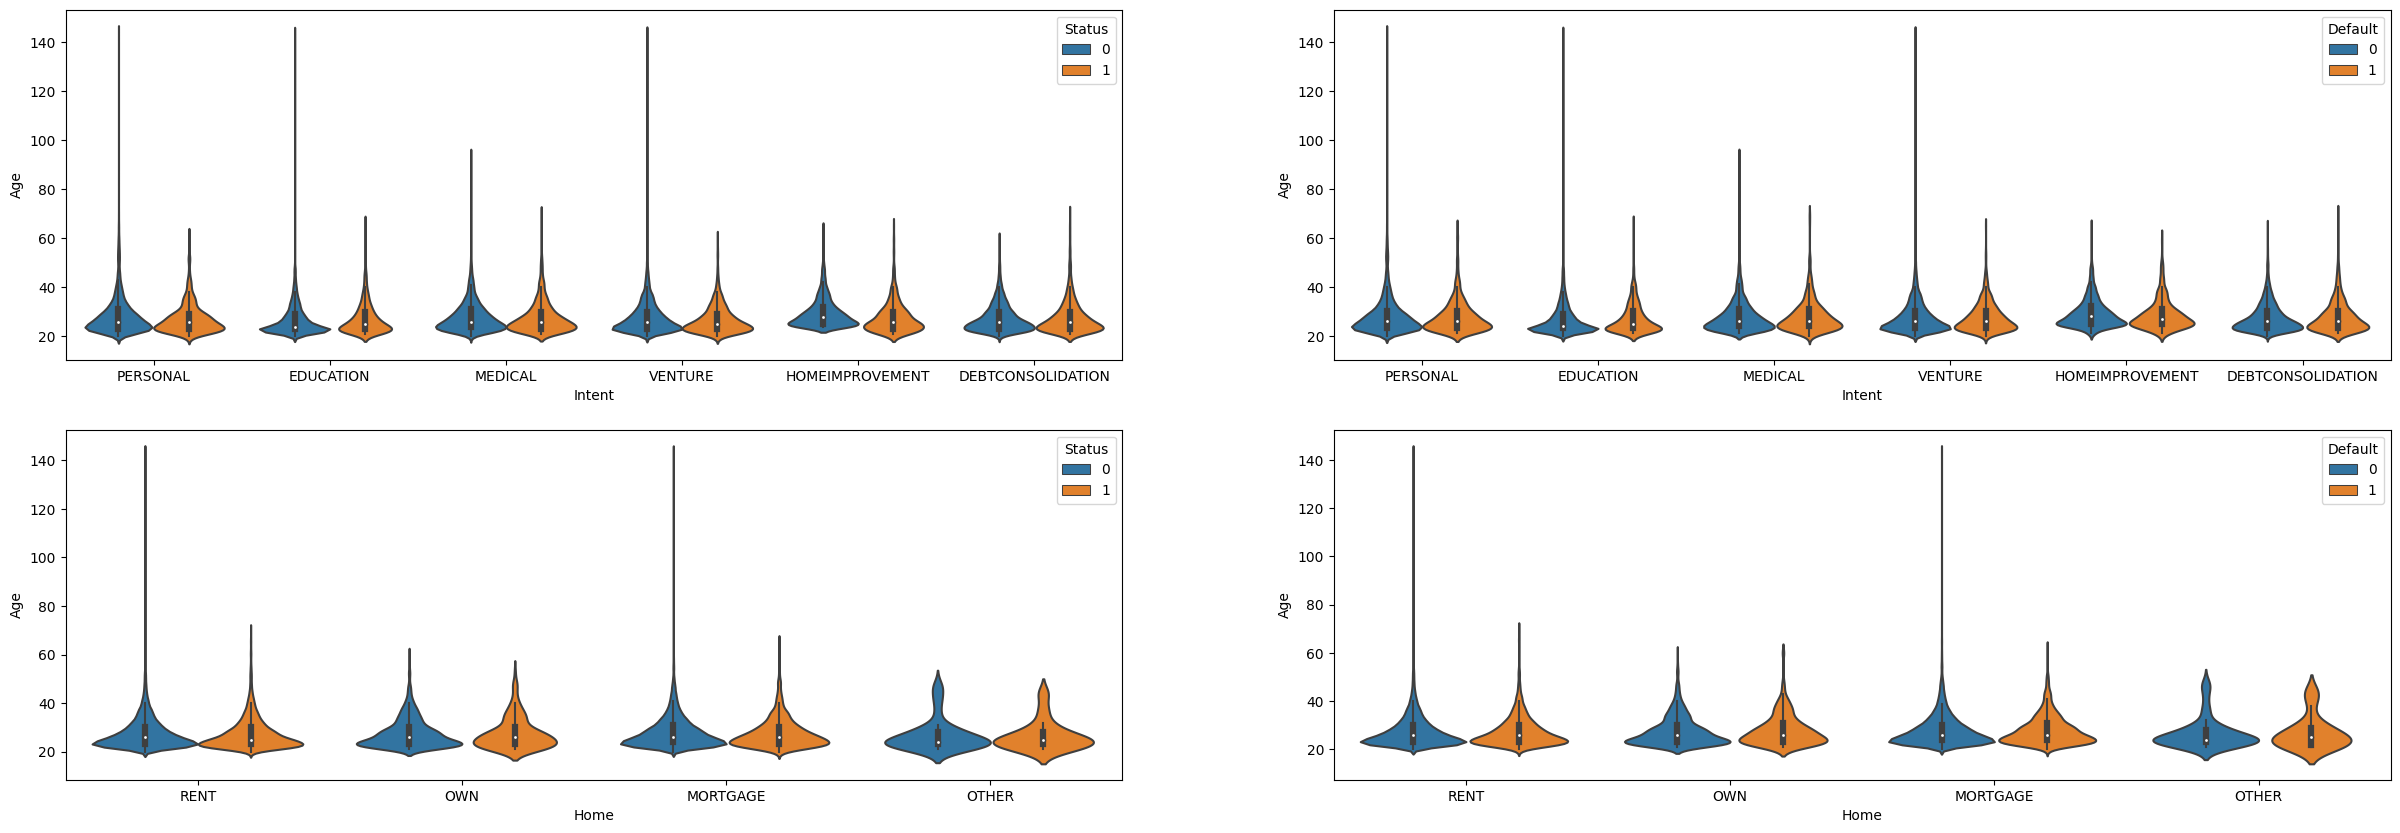

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sns.violinplot(data = df, x = 'Intent', y='Age', hue = 'Status', ax=ax[0,0])
sns.violinplot(data = df, x = 'Intent', y='Age', hue = 'Default', ax=ax[0,1])
sns.violinplot(data = df, x = 'Home', y='Age', hue = 'Status', ax=ax[1,0])
sns.violinplot(data = df, x = 'Home', y='Age', hue = 'Default', ax=ax[1,1])

plt.show()

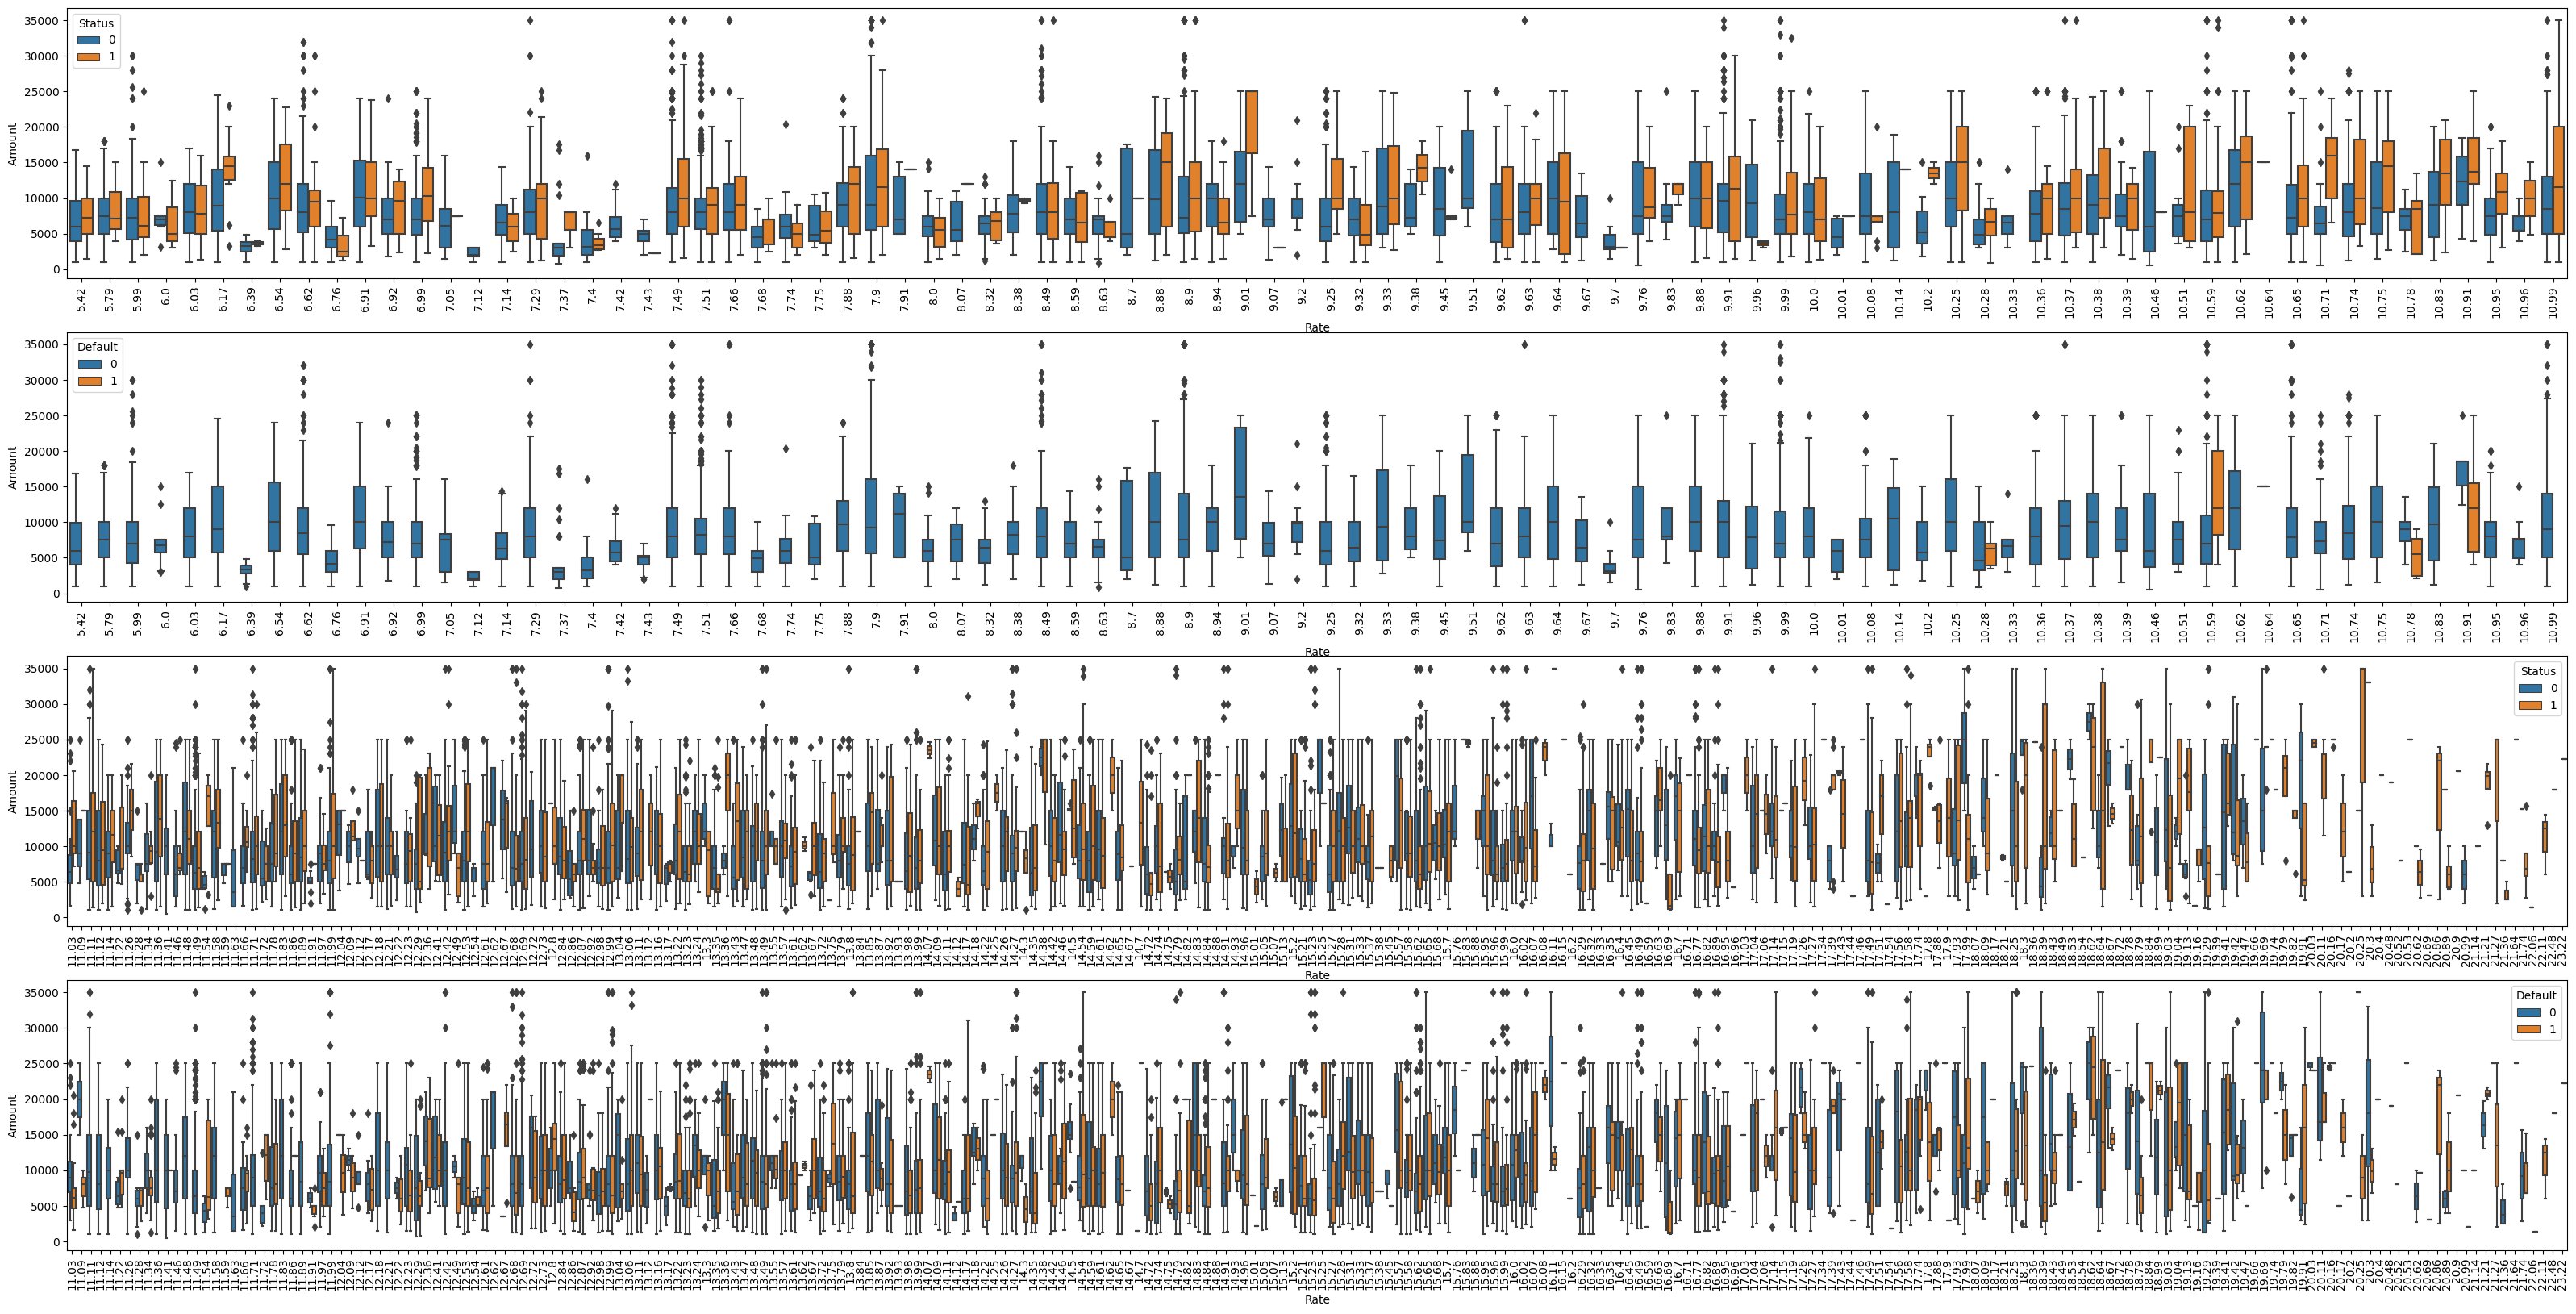

In [199]:
fig, ax = plt.subplots(4, 1, figsize=(40, 20))

sns.boxplot(data=df[df['Rate'] <= df['Rate'].median()], x='Rate', y='Amount', hue='Status', ax=ax[0])
sns.boxplot(data=df[df['Rate'] <= df['Rate'].median()], x='Rate', y='Amount', hue='Default', ax=ax[1])
sns.boxplot(data=df[df['Rate'] > df['Rate'].median()], x='Rate', y='Amount', hue='Status', ax=ax[2])
sns.boxplot(data=df[df['Rate'] > df['Rate'].median()], x='Rate', y='Amount', hue='Default', ax=ax[3])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=90)

plt.show()

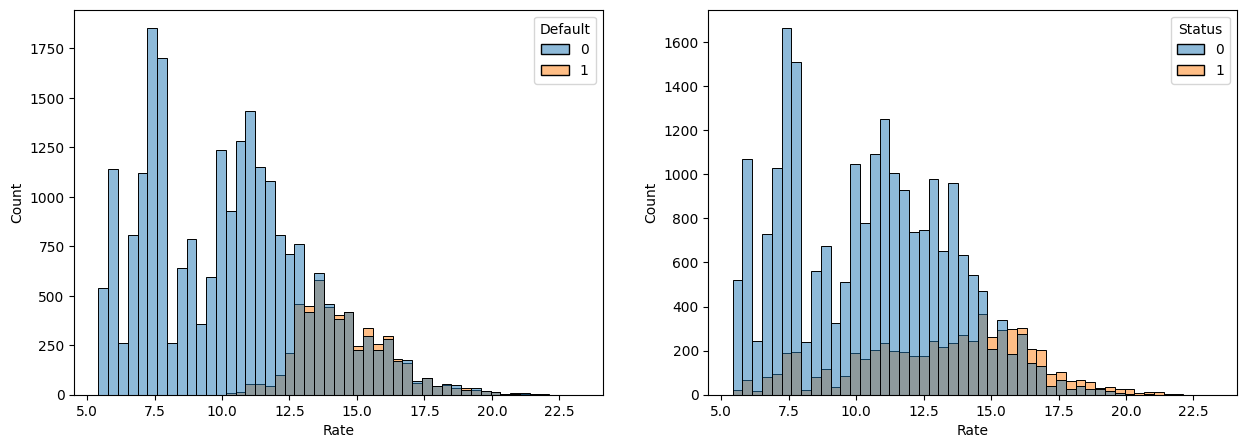

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data = df, x = 'Rate', hue = 'Default', ax=ax[0])
sns.histplot(data = df, x = 'Rate', hue = 'Status', ax=ax[1])

plt.show()


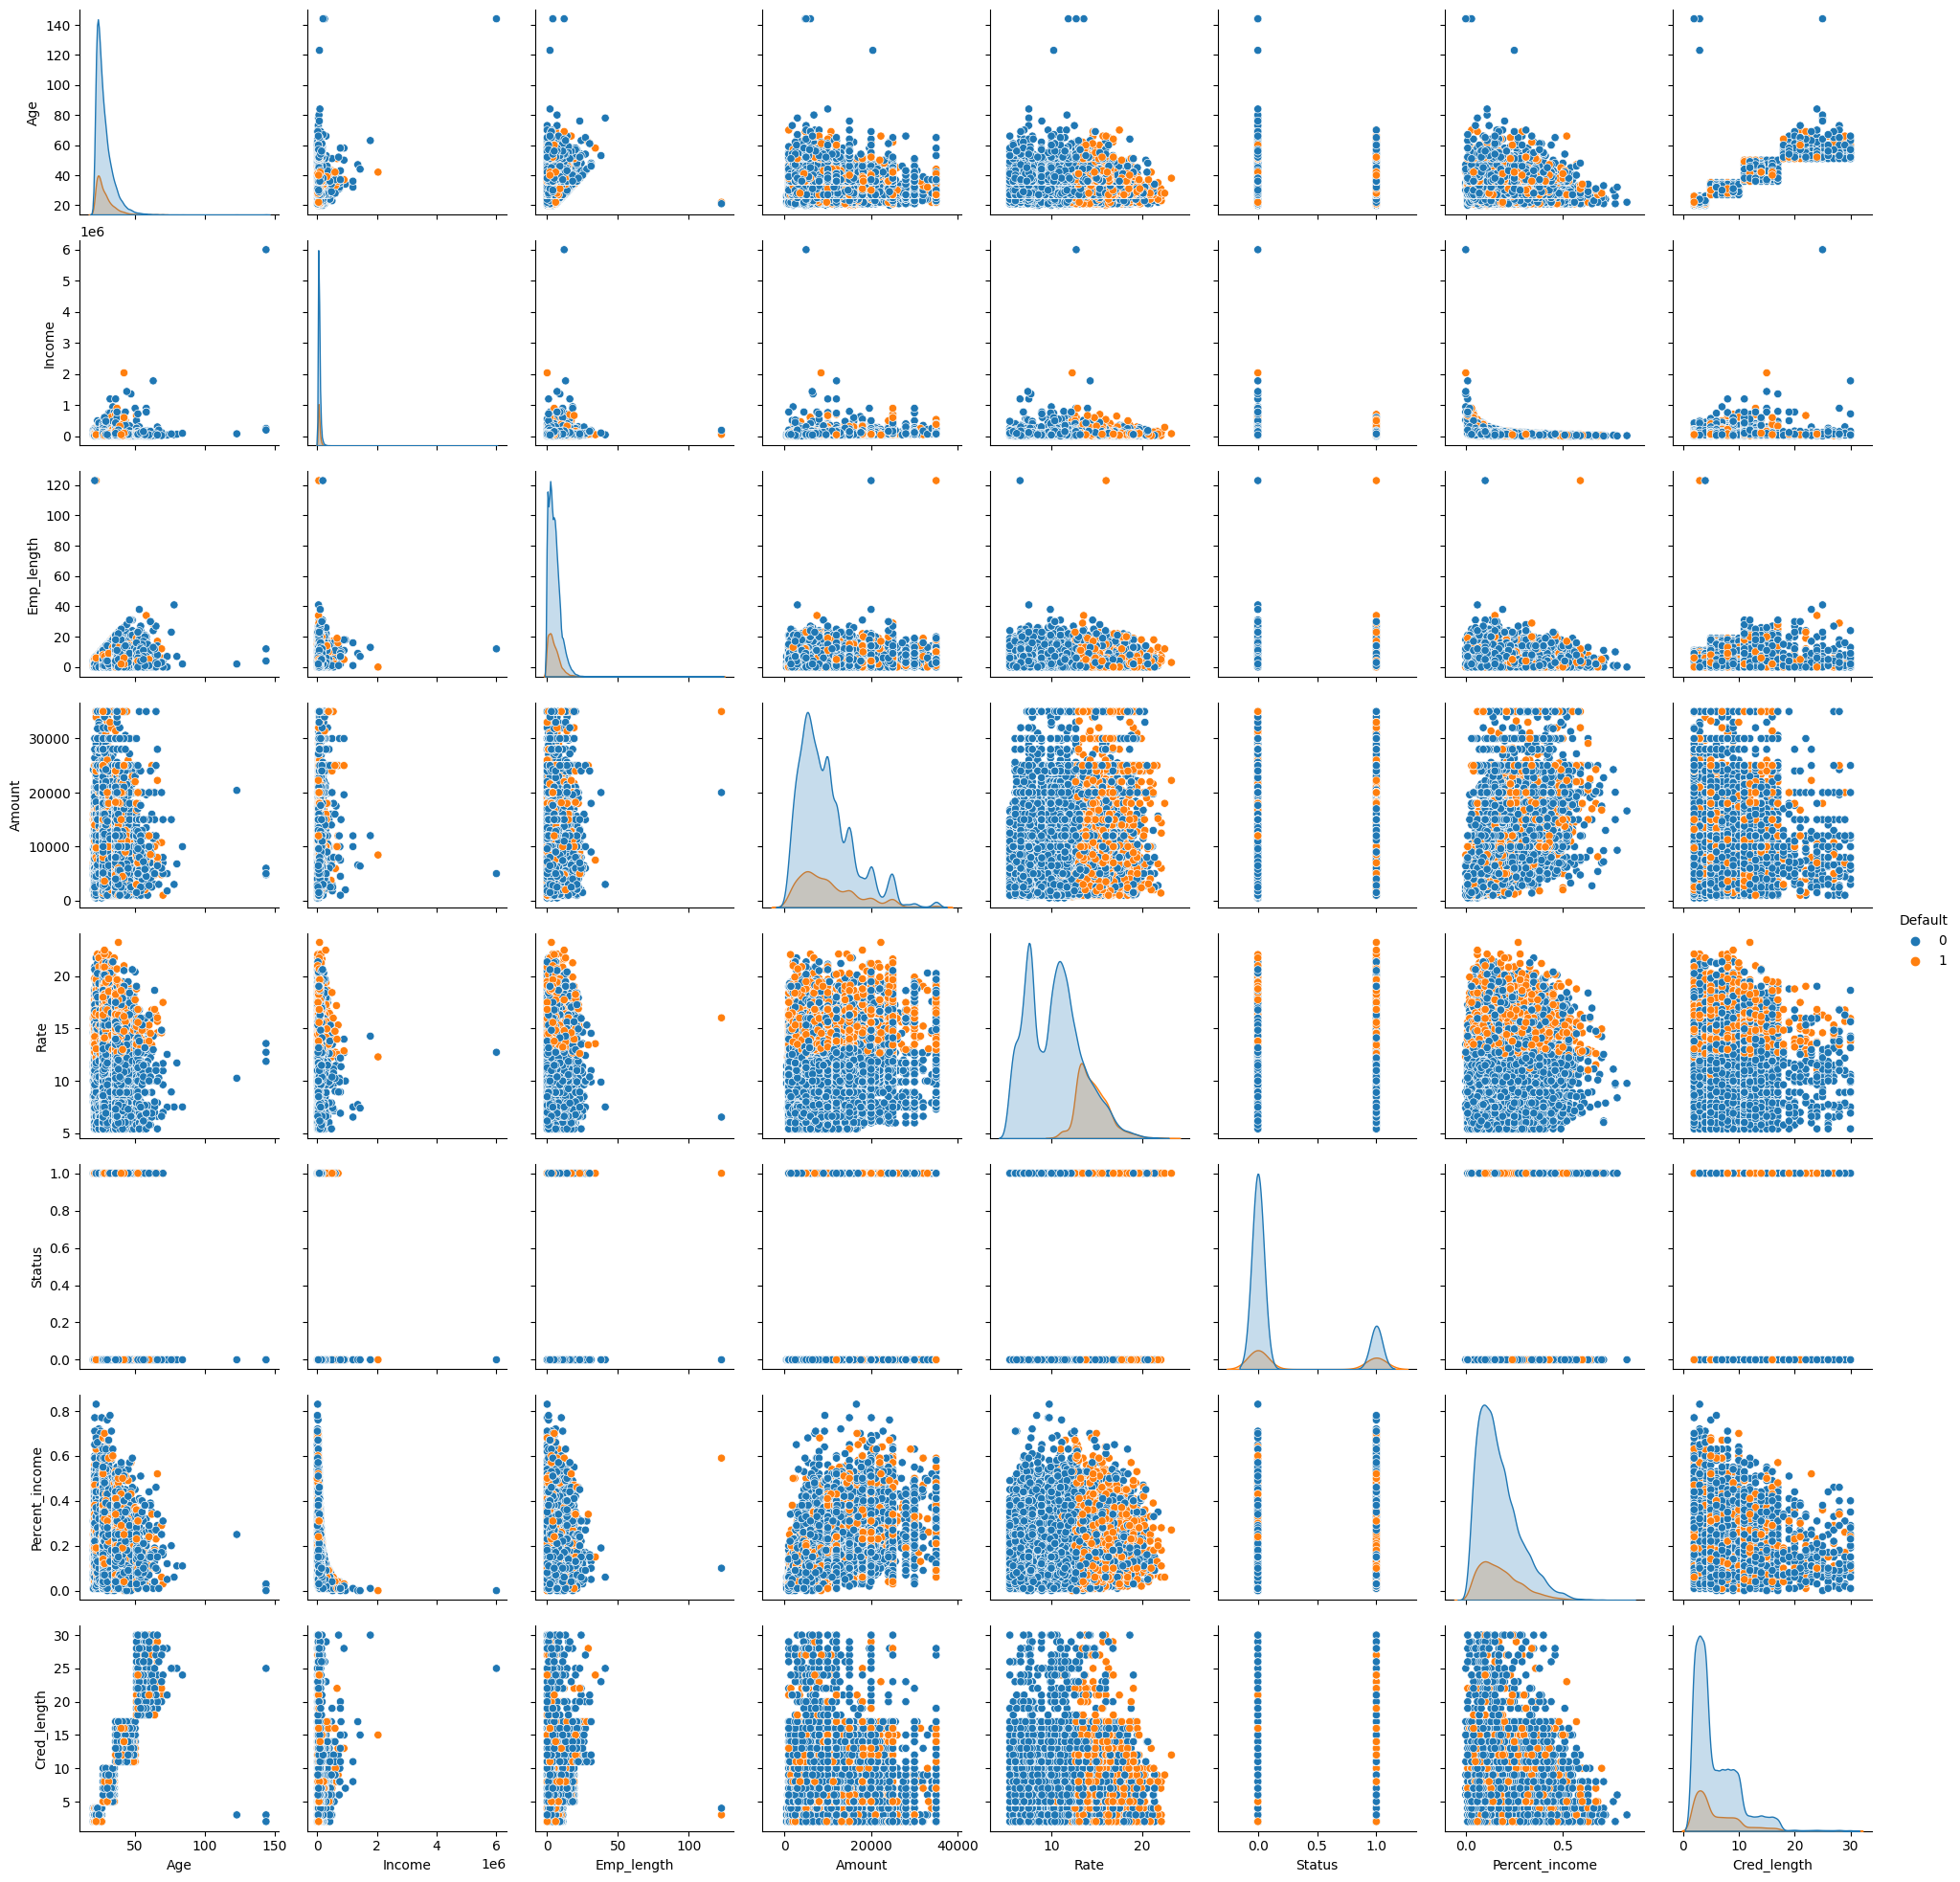

In [ ]:
sns.pairplot(df[['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate','Status', 'Percent_income', 'Default', 'Cred_length']], hue='Default')
plt.show()

In [ ]:
lb = LabelEncoder()

df['Intent'] = lb.fit_transform(df['Intent'])
df['Home'] = lb.fit_transform(df['Home'])
df.head(1)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3


**Select Best Features**

In [184]:
X = df.drop(columns=['Default', 'Id'])
y = df['Default']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

,Feature,F_Score,P_Value
6,Rate,9558.272402,0.000000e+00
7,Status,981.243660,8.088586e-212
2,Home,112.303637,3.428264e-26
5,Amount,46.629209,8.748456e-12
8,Percent_income,37.513535,9.196153e-10
3,Emp_length,22.248830,2.406333e-06
9,Cred_length,2.018630,1.553901e-01
0,Age,1.726925,1.888145e-01
1,Income,0.210127,6.466711e-01
4,Intent,0.171093,6.791451e-01


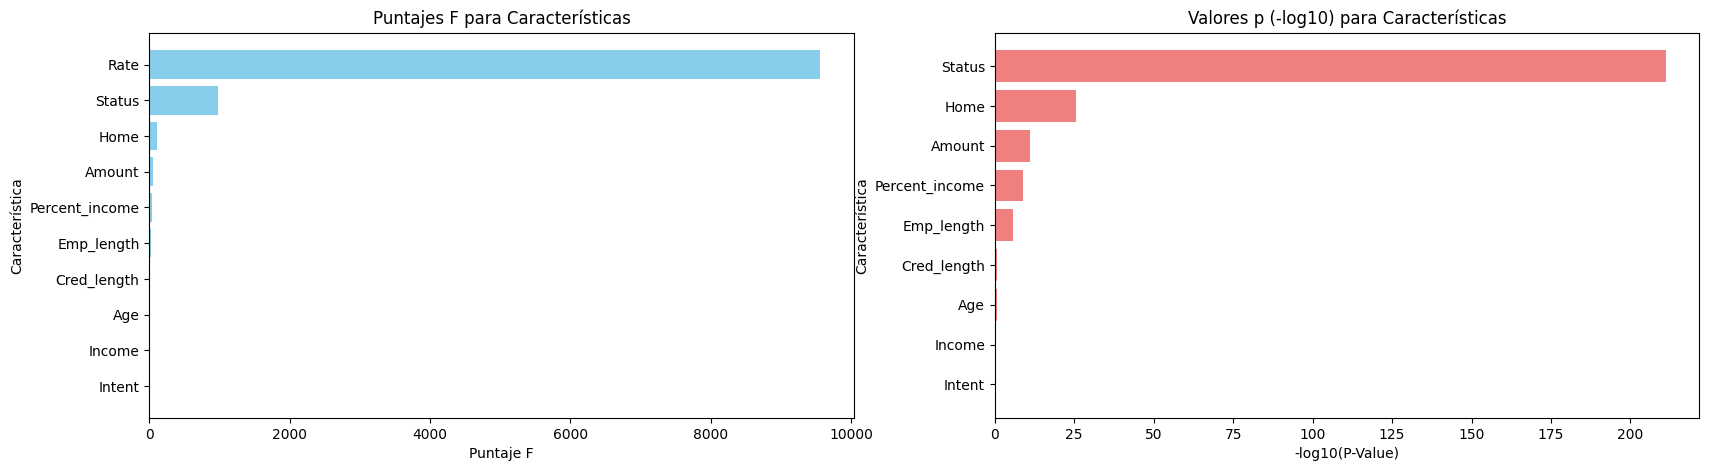

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [186]:
cols = feature_scores_df[feature_scores_df['F_Score']>=0].Feature.to_list()

**Modeling and Evaluation**

In [187]:
X_M = df[cols]
Y_M = df['Default']
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_M, Y_M, test_size=0.3, random_state=42)

**Logistic Regression**

In [188]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7058
           1       0.00      0.00      0.00      1534

    accuracy                           0.82      8592
   macro avg       0.41      0.50      0.45      8592
weighted avg       0.67      0.82      0.74      8592

accuracy:  0.8214618249534451
mean_absolute_error:  0.17853817504655495
mean_squared_error:  0.17853817504655495


**Random Forest Classifier**

In [190]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7058
           1       0.50      0.43      0.46      1534

    accuracy                           0.82      8592
   macro avg       0.69      0.67      0.68      8592
weighted avg       0.81      0.82      0.82      8592

accuracy:  0.8211126629422719
mean_absolute_error:  0.1788873370577281
mean_squared_error:  0.1788873370577281


**Decision Tree**

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7058
           1       0.52      0.50      0.51      1534

    accuracy                           0.83      8592
   macro avg       0.70      0.70      0.70      8592
weighted avg       0.83      0.83      0.83      8592

accuracy:  0.8273975791433892
mean_absolute_error:  0.1726024208566108
mean_squared_error:  0.1726024208566108


0    7060.5
1    1530.9
Name: Default, dtype: float64


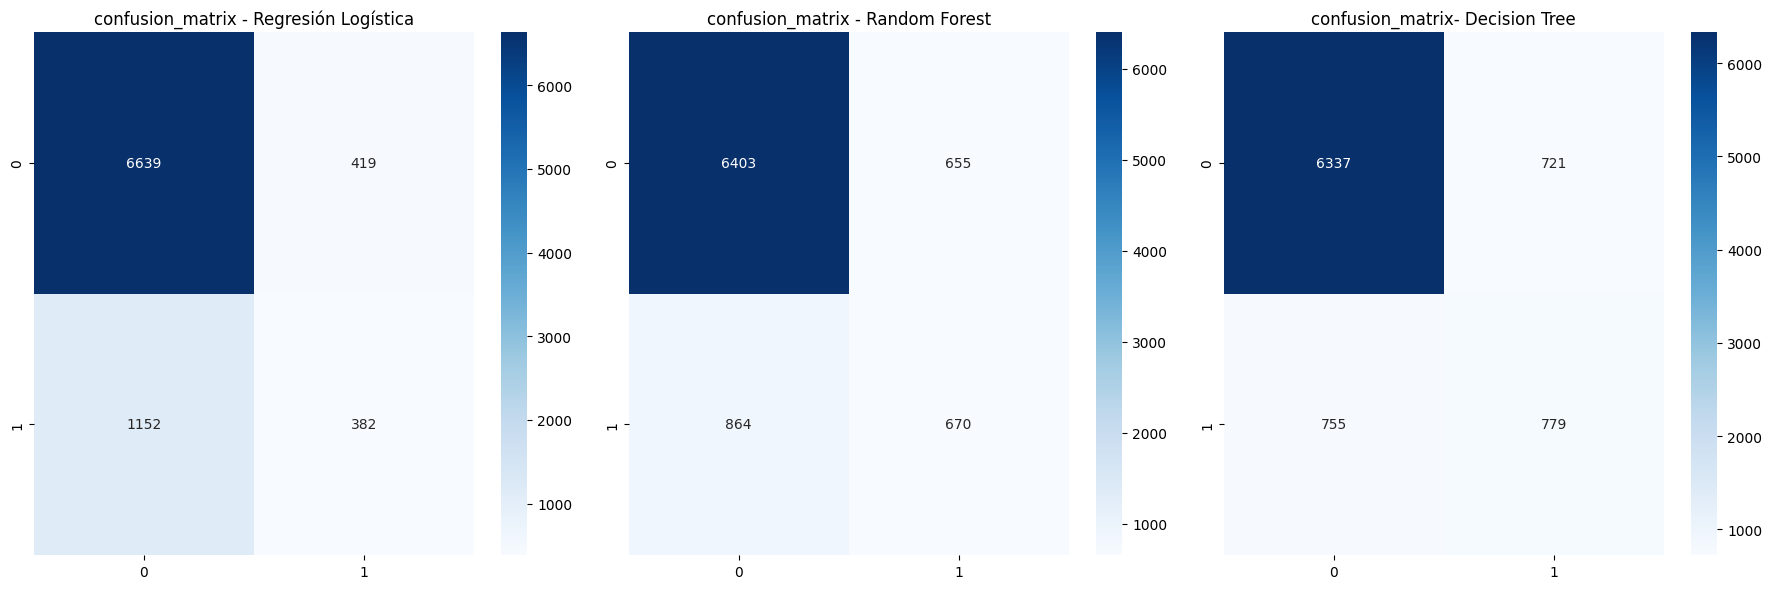

In [ ]:
logistic_conf_matrix = confusion_matrix(y_test, model_pred_L)
random_forest_conf_matrix = confusion_matrix(y_test, model_pred_R)
decision_tree_conf_matrix = confusion_matrix(y_test, model_pred_T)

plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Logistic Regression')

plt.subplot(132)
sns.heatmap(random_forest_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Random Forest')

plt.subplot(133)
sns.heatmap(decision_tree_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix- Decision Tree')

plt.tight_layout()
print(df['Default'].value_counts()*0.3)
plt.show()

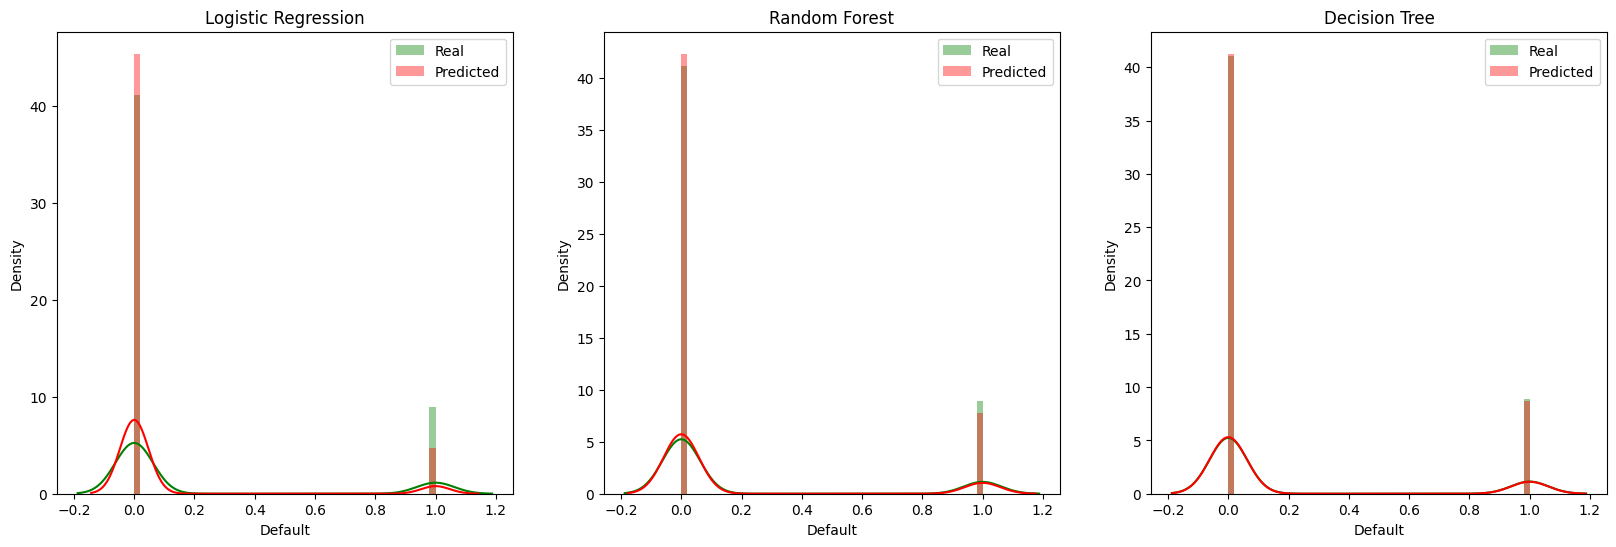

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('Decision Tree')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()